<center>

# Compulsory Assignment 2 

## Natural Language Processing [KAN - CSCO1002U]
<center>

### Importing Modules 

In [11]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns 

import nltk
import re
from nltk.corpus import stopwords
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

### Importing the Data 

In [2]:
# Loading the data 
df = pd.read_csv("C:/Users/fredr/Downloads/archive (4)/articles1.csv")
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [3]:
# Removing columns 
df.drop(df.columns[[0,1,2,4,5,6,7,8]], axis = 1, inplace = True)
df.head()

,publication,content
0,New York Times,WASHINGTON — Congressional Republicans have...
1,New York Times,"After the bullet shells get counted, the blood..."
2,New York Times,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,New York Times,"Death may be the great equalizer, but it isn’t..."
4,New York Times,"SEOUL, South Korea — North Korea’s leader, ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   publication  50000 non-null  object
 1   content      50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Publication Value Counts')

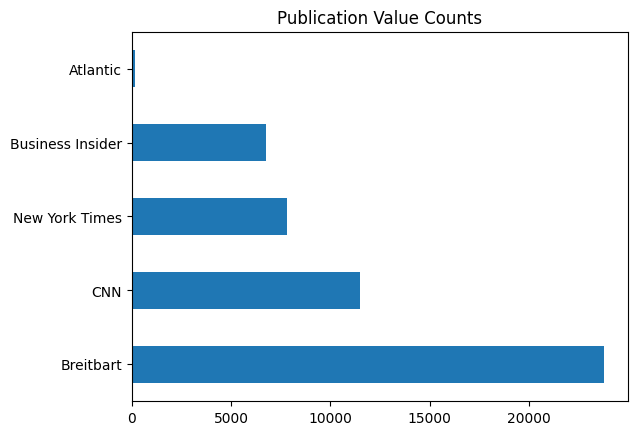

In [5]:
# Countplot shows the distribution of Publication
df['publication'].value_counts().plot(kind ='barh').set_title('Publication Value Counts')

In [6]:
# Function for Cleaning text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean(text):
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    # Tokenize the article into words
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens 
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a cleaned article
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [7]:
# Cleaning the text
df['content'] = df['content'].apply(clean)

In [8]:
df.head()

,publication,content
0,New York Times,washington congressional republican new fear c...
1,New York Times,bullet shell get counted blood dry votive cand...
2,New York Times,walt disney bambi opened 1942 critic praised s...
3,New York Times,death may great equalizer isnt necessarily eve...
4,New York Times,seoul south korea north korea leader kim said ...


https://dagshub.com/raduga256/Text-Classification-with-NLP-Tf-Idf-vs-Word2Vec-vs-BERT/src/main/news_category_classification.ipynb

### Word Embeddings

#### Bag of Words 

In [9]:
def bow (df,column):
    vect_bow = CountVectorizer()
    vect_bow.fit(df[column])
    bow_matrix = vect_bow.transform(df[column])
    return bow_matrix, bow_matrix.shape

bow(df, "content")

(<50000x170793 sparse matrix of type '<class 'numpy.int64'>'
 	with 11500357 stored elements in Compressed Sparse Row format>,
 (50000, 170793))

#### Word2Vec 

In [12]:
# Training on our own data

def selfword2vec (df, column, word):
    # Prepare the data for training the Word2Vec model
    sentences = [article.split() for article in df[column]]
    
    # Train the Word2Vec model
    word2vec_df = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    
    # Get the word vector for a specific word
    word_vector = word2vec_df.wv[word]

    # Find similar words to a given word
    similar_words = word2vec_df.wv.most_similar(word, topn=5)

    print(similar_words)
    return word2vec_df

selfword2vec(df, "content", "contract")

# word2vec_df is the embedding

[('lease', 0.6390711665153503), ('agreement', 0.6300197243690491), ('compensation', 0.6263264417648315), ('arbitration', 0.6021906733512878), ('sponsorship', 0.5800870656967163)]


In [13]:
# Google trained one 

import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### Text Classifiers 